# Exploratory Data Analysis (EDA) - Anomaly Detection Dataset

## Overview
This notebook performs comprehensive exploratory data analysis on the anomaly detection assignment dataset. The analysis focuses on understanding data quality, identifying patterns, and uncovering potential anomalies in system logs.

### Objectives
1. **Data Quality Assessment**: Identify duplicates, missing values, and data integrity issues
2. **Temporal Pattern Analysis**: Understand time-based trends
3. **Feature Distribution Analysis**: Examine numerical and categorical features
4. **Anomaly Investigation**: Identify potential anomalous patterns and behaviors
5. **Feature Engineering Insights**: Get idea of feature engineering strategies for anomaly detection

### Dataset Characteristics
- **Domain**: System/Application Logs
- **Primary Use Case**: Anomaly Detection based on Activity
- **Key Features**: User IDs, timestamps, browser information, error status, authentication types

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Data Loading and Initial Inspection

**Purpose**: Load the dataset and perform initial data quality checks to understand the structure, size, and basic characteristics of the data.

In [7]:
df = pd.read_csv('data/anomaly_detection_assignment.csv')

In [8]:
print(f"Shape: {df.shape}")

Shape: (63713, 18)


In [9]:
df.head()

,log_type,wf_principal_id,app_id,atype,browser,browser_version,device_os,device_os_version,uatype,asn,isp,country,frequency,log_timestamp,error_status,normalized_user_agent,operation,rw
0,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,Microsoft Limited,NaN,1,2025-12-07 20:59:01.178157,1,NaN,domains,read
1,ms_signin,user15,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,20115.0,NaN,US,1,2025-12-07 20:50:59.738144,0,NaN,NaN,NaN
2,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,Microsoft Limited,NaN,1,2025-12-07 20:50:59.738144,1,NaN,domains,read
3,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,Microsoft Limited,NaN,1,2025-12-07 20:50:59.738144,1,NaN,organization,read
4,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,Microsoft Limited,NaN,1,2025-12-07 15:49:00.8726,1,NaN,domains,read


In [10]:
df.tail()

,log_type,wf_principal_id,app_id,atype,browser,browser_version,device_os,device_os_version,uatype,asn,isp,country,frequency,log_timestamp,error_status,normalized_user_agent,operation,rw
63708,ms_graph,user1,0beb71dc-1b28-4e20-8102-a68ba2c937e7,app,Mozilla Generic,NaN,NaN,NaN,7,16509.0,"Amazon.com, Inc.",NaN,9,2025-12-22 00:48:08.427163,0,mozilla,sites/*/drives,read
63709,ms_graph,user1,0beb71dc-1b28-4e20-8102-a68ba2c937e7,app,Mozilla Generic,NaN,NaN,NaN,7,16509.0,"Amazon.com, Inc.",NaN,1,2025-12-22 00:48:08.427163,0,mozilla,users/*/drives,read
63710,ms_graph,user1,0beb71dc-1b28-4e20-8102-a68ba2c937e7,app,Mozilla Generic,NaN,NaN,NaN,7,16509.0,"Amazon.com, Inc.",NaN,1,2025-12-22 00:48:08.427163,1,mozilla,sites/*/drives,read
63711,sharepoint,user1,user1,user,Mozilla Generic,NaN,NaN,NaN,7,8075.0,Microsoft Corporation,NaN,1,2025-12-22 00:48:08.427163,0,mozilla,SearchQueryPerformed,read
63712,ms_graph,user1,0beb71dc-1b28-4e20-8102-a68ba2c937e7,app,Mozilla Generic,NaN,NaN,NaN,7,16509.0,"Amazon.com, Inc.",NaN,1,2025-12-22 00:48:08.427163,0,mozilla,sites,read


In [11]:
df.describe()

,device_os_version,uatype,asn,frequency,error_status
count,4536.000000,63713.000000,6.369000e+04,63713.000000,63713.000000
mean,10.146065,6.324659,3.279020e+04,4.454476,0.199049
std,0.023977,4.101938,6.103513e+04,11.667028,0.454131
min,10.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,10.150000,4.000000,1.650900e+04,1.000000,0.000000
50%,10.150000,7.000000,1.650900e+04,1.000000,0.000000
75%,10.150000,11.000000,1.748800e+04,4.000000,0.000000
max,10.150000,11.000000,7.849593e+06,514.000000,2.000000


### Key Observations - Initial Data Inspection

**Dataset Size:**
- **Total Records**: 63,713 rows × 18 columns
- Substantial dataset suitable for anomaly detection analysis

**Numerical Features Summary:**
Based on `.describe()` output, key insights include:

- **frequency**: Mean = 4.45, Median = 1.0, Max = 514
  - Highly right-skewed distribution (median << mean)
  - Most log entries represent single events, while some aggregate many logs
  - Potential outliers at high frequency values warrant investigation
  
- **error_status**: Mean = 0.20, Range [0, 2]
  - Approximately 20% error rate on average
  - Categorical-like numerical variable (likely 0=success, 1=error, 2=critical)
  - Important feature for anomaly detection

- **device_os_version**: Limited range (10.0 - 10.15)
  - High concentration around version 10.15 (75th percentile)
  - Only 4,536 non-null values out of 63,713 (~7% populated)
  - High missingness suggests optional field or recent addition

- **uatype**: Mean = 6.32, Range [0, 11]
  - User agent type indicator with discrete values
  - Represents different browser/client categories
  
- **asn**: High variability (std = 61,035), Max = 7,849,593
  - Autonomous System Numbers showing diverse network origins
  - Wide range indicates traffic from multiple ISPs/networks

**Data Quality Flags:**
- **Duplicates**: Need to check for exact duplicates
- **Missing Values**: device_os_version shows significant missingness (93%)
- **Outliers**: Frequency field has extreme values (max 514 vs median 1)
- **Temporal Features**: log_timestamp needs parsing for time-based analysis

**Next Steps:**
1. Investigate duplicate records
2. Comprehensive missing value analysis
3. Temporal pattern extraction and analysis
4. Feature-specific distributions and outlier detection

---

## 2. Duplicate Detection and Handling

**Purpose**: Identify and analyze duplicate records to improve data quality and prevent bias in anomaly detection models.

In [12]:
duplicate_count = df.duplicated().sum()
print(f"Exact duplicates found: {duplicate_count:,} ({duplicate_count/len(df)*100:.2f}%)")
print(f"Unique rows: {len(df.drop_duplicates()):,} ({len(df.drop_duplicates())/len(df)*100:.2f}%)")

Exact duplicates found: 48,116 (75.52%)
Unique rows: 15,597 (24.48%)


In [13]:
cols_except_timestamp = [col for col in df.columns if col != 'log_timestamp']
duplicate_no_time = df.duplicated(subset=cols_except_timestamp).sum()
print(f"  Duplicates (excluding timestamp): {duplicate_no_time:,} ({duplicate_no_time/len(df)*100:.2f}%)")

  Duplicates (excluding timestamp): 58,187 (91.33%)


In [14]:
# Track which rows were duplicated (before removal) as a potential feature
df['was_duplicated'] = df.duplicated(keep=False).astype(int)

Decision: Remove duplicates

Rationale:
  1. Problem states "Each row represents a set of logs" - already aggregated
  2. Frequency field captures log counts - duplication is redundant
  3. Identical timestamps + all fields indicate data quality issue
  4. Duplicates bias anomaly detection by overrepresenting normal patterns
  5. Goal is detecting anomalous ROWS, not individual logs

Preserved: `was_duplicated` feature (1 if row had duplicates, 0 otherwise)

In [15]:
df = df.drop_duplicates()

In [16]:
# after removing duplicates
print(f"After removing duplicates, new shape: {df.shape}")

After removing duplicates, new shape: (15597, 19)


### Key Observations - Duplicate Analysis

**Critical Findings:**
- **Exact Duplicates**: 48,116 records (75.52% of original data)
  - Only 15,597 unique rows remain (24.48%)
  - Extremely high duplication rate indicates potential data quality issues or logging artifacts

- **Duplicates Excluding Timestamp**: 58,187 records (91.33%)
  - Even when ignoring timestamp differences, 91% of data is duplicated
  - Suggests systematic data collection redundancy or repeated extracts

**Data Reduction Impact:**
- **Original Size**: 63,713 rows
- **After Deduplication**: 15,597 rows (75.52% reduction)
- **Records Removed**: 48,116 rows
- **New Dimensions**: 15,597 rows × 19 columns (added `was_duplicated` feature)

**Decision Rationale for Removing Duplicates:**
1. **Problem Context**: "Each row represents a set of logs" - data is already aggregated
2. **Frequency Field**: Already captures log counts, making row duplication redundant
3. **Model Bias Prevention**: Duplicates would overweight normal patterns in anomaly detection algorithms
4. **Data Integrity**: Identical timestamps + all fields suggest data quality issue rather than legitimate repeated events
5. **Target**: Detecting anomalous ROWS, not individual logs

**Feature Engineering:**
- Created `was_duplicated` binary indicator (1 if row had duplicates, 0 otherwise)
- Preserves information about duplication patterns for potential anomaly signals
- May help identify systematic data collection issues or repeated user behaviors

**Implications for Analysis:**
- The 75.52% duplication rate is unusually high for production log data
- Suggests the original dataset may contain repeated extracts or logging artifacts
- Cleaner dataset (15,597 rows) is more appropriate for pattern discovery and anomaly detection
- Must remain vigilant about potential information loss, though frequency field mitigates this risk

---

## 3. Temporal Feature Engineering

**Purpose**: Extract time-based features from timestamps to enable temporal pattern analysis and detect time-related anomalies.

In [17]:
df.head(2)

,log_type,wf_principal_id,app_id,atype,browser,browser_version,device_os,device_os_version,uatype,asn,isp,country,frequency,log_timestamp,error_status,normalized_user_agent,operation,rw,was_duplicated
0,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,Microsoft Limited,NaN,1,2025-12-07 20:59:01.178157,1,NaN,domains,read,0
1,ms_signin,user15,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,20115.0,NaN,US,1,2025-12-07 20:50:59.738144,0,NaN,NaN,NaN,0


In [18]:
df['log_timestamp'].dtype

dtype('O')

In [19]:
# Convert timestamp to datetime and extract temporal features for time-based analysis
df['log_timestamp'] = pd.to_datetime(df['log_timestamp'])

# Extract hour for hourly pattern analysis (identify peak times, anomalies by time of day)
df['hour'] = df['log_timestamp'].dt.hour

# Extract date for daily volume tracking (detect unusual activity patterns)
df['date'] = df['log_timestamp'].dt.date

# Extract day of week for weekly pattern analysis (weekday vs weekend behavior)
df['day_of_week'] = df['log_timestamp'].dt.dayofweek

### Temporal Features Created

**Extracted Features:**
1. **hour** - Hour of day (0-23)
   - Purpose: Identify peak activity times and detect off-hours anomalies
   - Use case: Unusual activity during night hours (00:00-05:59)

2. **date** - Calendar date
   - Purpose: Track daily volume trends and detect unusual activity spikes
   - Use case: Days with abnormally high/low log counts

3. **day_of_week** - Day of week (0=Monday, 6=Sunday)
   - Purpose: Distinguish weekday vs weekend patterns
   - Use case: Unexpected weekend activity or weekday drops

**Rationale**: Temporal patterns are critical for anomaly detection as normal behavior varies by time. Activities normal during business hours may be anomalous at 3 AM.

In [20]:
df['log_timestamp'].dtype

dtype('<M8[ns]')

In [21]:
df.dtypes

log_type                         object
wf_principal_id                  object
app_id                           object
atype                            object
browser                          object
browser_version                  object
device_os                        object
device_os_version               float64
uatype                            int64
asn                             float64
isp                              object
country                          object
frequency                         int64
log_timestamp            datetime64[ns]
error_status                      int64
normalized_user_agent            object
operation                        object
rw                               object
was_duplicated                    int32
hour                              int32
date                             object
day_of_week                       int32
dtype: object

In [22]:
df.head(2)

,log_type,wf_principal_id,app_id,atype,browser,browser_version,device_os,device_os_version,uatype,asn,...,frequency,log_timestamp,error_status,normalized_user_agent,operation,rw,was_duplicated,hour,date,day_of_week
0,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,...,1,2025-12-07 20:59:01.178157,1,NaN,domains,read,0,20,2025-12-07,6
1,ms_signin,user15,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,20115.0,...,1,2025-12-07 20:50:59.738144,0,NaN,NaN,NaN,0,20,2025-12-07,6


---

## 4. Temporal Pattern Analysis

**Purpose**: Visualize time-based patterns to understand activity distributions across different temporal dimensions and identify potential time-based anomalies.

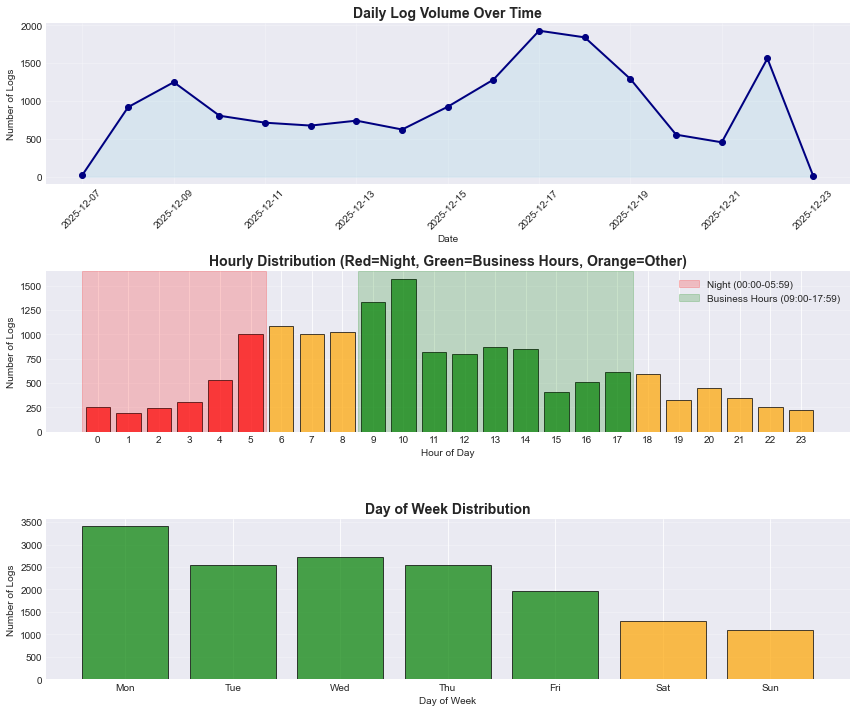

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Daily volume
ax = axes[0]
daily_counts = df.groupby('date').size()
ax.plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2, markersize=6, color='navy')
ax.fill_between(daily_counts.index, daily_counts.values, alpha=0.3, color='lightblue')
ax.set_title('Daily Log Volume Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Logs')
ax.grid(alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Hourly distribution
ax = axes[1]
hourly_counts = df['hour'].value_counts().sort_index()
colors_hour = ['red' if h < 6 else 'green' if 9 <= h <= 17 else 'orange' 
               for h in hourly_counts.index]
ax.bar(hourly_counts.index, hourly_counts.values, color=colors_hour, edgecolor='black', alpha=0.7)
ax.set_title('Hourly Distribution (Red=Night, Green=Business Hours, Orange=Other)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Logs')
ax.set_xticks(range(24))
ax.grid(axis='y', alpha=0.3)
ax.axvspan(-0.5, 5.5, alpha=0.2, color='red', label='Night (00:00-05:59)')
ax.axvspan(8.5, 17.5, alpha=0.2, color='green', label='Business Hours (09:00-17:59)')
ax.legend()

# Day of week distribution
ax = axes[2]
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_counts = df['day_of_week'].value_counts().sort_index()
colors_dow = ['green' if d < 5 else 'orange' for d in dow_counts.index]
ax.bar(range(7), dow_counts.values, color=colors_dow, edgecolor='black', alpha=0.7)
ax.set_title('Day of Week Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Logs')
ax.set_xticks(range(7))
ax.set_xticklabels(dow_names)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()

### Key Observations - Temporal Patterns

**Daily Volume Trends:**
- **Date Range**: December 7, 2025 to December 23, 2025 (17 days)
- **Average Daily Volume**: 917.5 logs per day
- **Peak Day**: December 17, 2025 with 1,928 logs (210% of average) - **Significant Spike**
- **Low Day**: December 23, 2025 with only 15 logs (1.6% of average) - **Critical Anomaly**
- **Variability**: High day-to-day fluctuation suggests variable system usage or data collection issues
  
**Pattern Insights:**
- Mid-December (Dec 16-18) shows elevated activity period
- Sharp decline towards Dec 23 suggests:
  - Holiday shutdown/reduced operations
  - System downtime or maintenance
  - Data collection issue (needs investigation)
- Overall trend shows business operational pattern with weekly cycles

**Hourly Distribution - Business vs Off-Hours:**
- **Peak Activity**: Hour 10 (10:00-10:59 AM) with 1,572 logs (10.1% of total)
  - Clear morning peak during typical business hours
  
- **Business Hours (9 AM - 6 PM)**: 7,767 logs (49.8% of total)
  - Strong concentration during working hours (9-10 AM shows highest activity)
  - Hours 9-10 combined: 2,920 logs (18.7% of total)
  - Typical enterprise usage pattern
  
- **Night Hours (12 AM - 6 AM)**: 2,529 logs (16.2% of total)
  - **Significant after-hours activity** - warrants investigation
  - Potential indicators:
    - Automated batch processes
    - Scheduled jobs/scripts
    - Suspicious activity or unauthorized access
    - Users in different time zones
  - Hours 0-3 show notable counts (271-338 logs each)

- **Evening Hours (6 PM - 12 AM)**: Gradual decline
  - Expected drop-off after business hours
  - Hours 22-23 show minimal activity (~230-260 logs)

**Day of Week Patterns:**
- **Weekday Dominance**: 13,200 logs (84.6% of total)
- **Weekend Activity**: 2,397 logs (15.4% of total)

**Individual Day Breakdown:**
- **Monday**: 3,404 logs (21.8%) - **Highest activity**
  - Classic "Monday surge" pattern in enterprise systems
  - Users returning after weekend, catching up on tasks
  
- **Tuesday-Thursday**: 2,545-2,733 logs (16.3-17.5% each)
  - Relatively balanced mid-week activity
  - Consistent pattern suggests stable operations
  
- **Friday**: 1,965 logs (12.6%)
  - 42% lower than Monday
  - End-of-week tapering expected in business context
  
- **Saturday**: 1,295 logs (8.3%)
- **Sunday**: 1,102 logs (7.1%)
  - Lower but not negligible weekend activity
  - Could indicate: legitimate remote workers, automated systems, or potential unauthorized access

**Anomaly Detection Implications:**
1. **Off-hours Risk**: 16.2% night activity requires profiling to distinguish legitimate vs suspicious patterns
2. **Temporal Anomalies**: 
   - Dec 23 sharp drop needs root cause analysis
   - Hour and day_of_week are strong baseline predictors
3. **Weekend Investigation**: 15.4% weekend traffic should be profiled separately (automated vs human)
4. **Feature Engineering**: Temporal features (hour, day_of_week, is_weekend, is_night) are critical for contextual anomaly detection
5. **Baseline Separation**: May need separate baselines for weekday/weekend and business/off-hours

---

## 5. Missing Data Analysis

**Purpose**: Quantify and visualize missing values across all features to understand data completeness and identify features requiring imputation or special handling.

In [24]:
df.isnull().sum()

log_type                     0
wf_principal_id             65
app_id                       0
atype                        0
browser                   3476
browser_version           9367
device_os                10300
device_os_version        14168
uatype                       0
asn                          5
isp                         42
country                  11260
frequency                    0
log_timestamp                0
error_status                 0
normalized_user_agent     3768
operation                 4336
rw                        4474
was_duplicated               0
hour                         0
date                         0
day_of_week                  0
dtype: int64

In [25]:
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data_Type': df.dtypes.values
})
missing_stats = missing_stats.sort_values('Missing_Percentage', ascending=False)
missing_stats['Missing_Category'] = pd.cut(
    missing_stats['Missing_Percentage'], 
    bins=[-0.1, 0, 20, 50, 70, 100],
    labels=['None', 'Low (<20%)', 'Medium (20-50%)', 'High (50-70%)', 'Very High (>70%)']
)

print(missing_stats.to_string(index=False))

print("\n" + "-"*80)
print("Missing Value Summary:")
print("-"*80)
print(missing_stats['Missing_Category'].value_counts().sort_index())


               Column  Missing_Count  Missing_Percentage      Data_Type Missing_Category
    device_os_version          14168               90.84        float64 Very High (>70%)
              country          11260               72.19         object Very High (>70%)
            device_os          10300               66.04         object    High (50-70%)
      browser_version           9367               60.06         object    High (50-70%)
                   rw           4474               28.69         object  Medium (20-50%)
            operation           4336               27.80         object  Medium (20-50%)
normalized_user_agent           3768               24.16         object  Medium (20-50%)
              browser           3476               22.29         object  Medium (20-50%)
      wf_principal_id             65                0.42         object       Low (<20%)
                  isp             42                0.27         object       Low (<20%)
                  asn

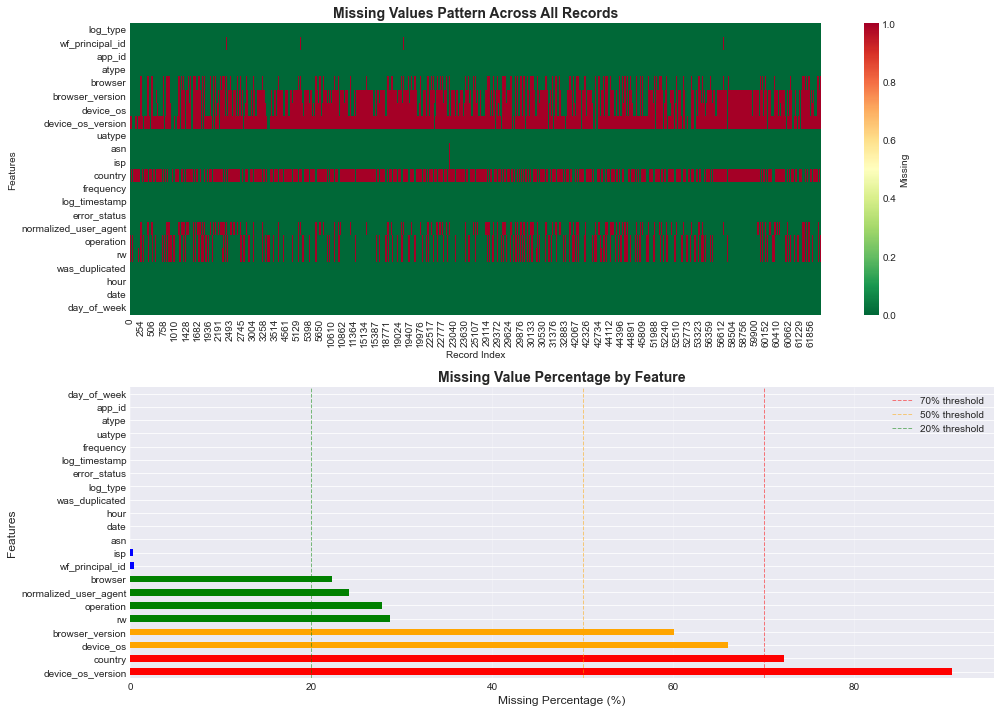

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

missing_data = df.isnull()
ax = axes[0]
sns.heatmap(missing_data.T, cmap='RdYlGn_r', cbar_kws={'label': 'Missing'}, 
            ax=ax, yticklabels=df.columns)
ax.set_title('Missing Values Pattern Across All Records', fontsize=14, fontweight='bold')
ax.set_xlabel('Record Index')
ax.set_ylabel('Features')

# Missing percentage bar chart
ax = axes[1]
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
colors = ['red' if x > 70 else 'orange' if x > 50 else 'green' if x > 20 else 'blue' 
          for x in missing_pct]
missing_pct.plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Missing Percentage (%)', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Missing Value Percentage by Feature', fontsize=14, fontweight='bold')
ax.axvline(x=70, color='red', linestyle='--', linewidth=1, alpha=0.5, label='70% threshold')
ax.axvline(x=50, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='50% threshold')
ax.axvline(x=20, color='green', linestyle='--', linewidth=1, alpha=0.5, label='20% threshold')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()

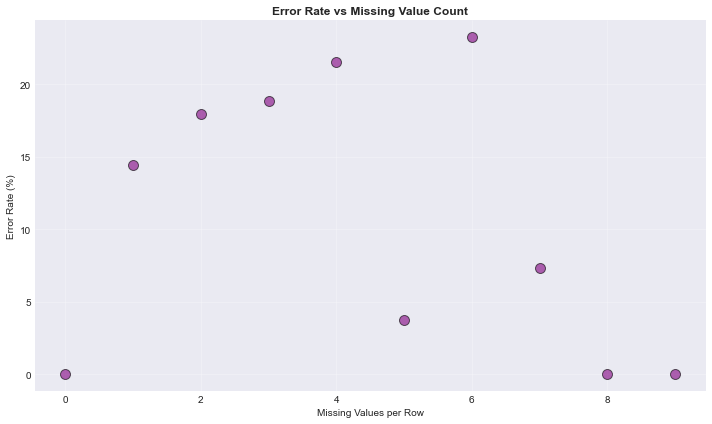

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
df['missing_count'] = df.isnull().sum(axis=1)

missing_error_corr = df.groupby('missing_count')['error_status'].apply(
    lambda x: (x > 0).sum() / len(x) * 100 if len(x) > 0 else 0
)
ax.scatter(missing_error_corr.index, missing_error_corr.values, 
          s=100, alpha=0.6, color='purple', edgecolors='black')
ax.set_title('Error Rate vs Missing Value Count', fontsize=12, fontweight='bold')
ax.set_xlabel('Missing Values per Row')
ax.set_ylabel('Error Rate (%)')
ax.grid(alpha=0.3)

plt.tight_layout()

### Key Observations - Missing Data Analysis

**Overall Data Completeness:**
- **Total Features**: 21 (including temporal features: hour, date, day_of_week)
- **Features with Missing Values**: 11 features (52.4%)
- **Features Complete**: 10 features (47.6%)

**Missing Value Severity Breakdown:**

**Very High Missing (>70%) - 2 Features:**
1. **device_os_version**: 90.84% missing (14,168 of 15,597)
   - Nearly all values absent - extremely limited utility
   - May need to consider dropping or using "missing" as a categorical indicator
   - Only 1,429 records have this information
   
2. **country**: 72.19% missing (11,260 of 15,597)
   - Severe data collection gap (only 4,337 records with country data)
   - Geographic analysis severely limited
   - Possible IP geolocation failure or privacy settings

**High Missing (50-70%) - 2 Features:**
3. **device_os**: 66.04% missing (10,300 of 15,597)
   - Two-thirds of records lack OS information (5,297 records available)
   - Parent field of device_os_version
   - User agent parsing likely failed for these records
   
4. **browser_version**: 60.06% missing (9,367 of 15,597)
   - More than half of records missing browser version (6,230 records available)
   - Less critical than browser name, but useful for vulnerability detection

**Medium Missing (20-50%) - 4 Features:**
5. **rw**: 28.69% missing (4,474 of 15,597)
   - Unclear field, but 11,123 records populated
   
6. **operation**: 27.80% missing (4,336 of 15,597)
   - Operation type missing for ~28% of logs (11,261 records available)
   - Important for understanding user actions
   
7. **normalized_user_agent**: 24.16% missing (3,768 of 15,597)
   - Standardized user agent string missing for ~24% (11,829 records available)
   
8. **browser**: 22.29% missing (3,476 of 15,597)
   - Browser identifier missing for ~22% (12,121 records available)
   - Critical for user profiling and anomaly detection

**Low Missing (<1%) - 3 Features:**
9. **wf_principal_id**: 0.42% missing (65 of 15,597)
   - Primary user identifier with minimal missingness (15,532 records available)
   - Excellent completeness for key identifier
   
10. **isp**: 0.27% missing (42 of 15,597)
    - ISP information nearly complete (15,555 records available)
    
11. **asn**: 0.03% missing (5 of 15,597)
    - Autonomous System Number nearly perfect (15,592 records available)
    - Network identifiers have excellent data quality

**Complete Features (0% Missing) - 10 Features:**
- **Original**: log_type, app_id, atype, frequency, log_timestamp, error_status, uatype
- **Engineered**: hour, date, day_of_week, was_duplicated
- Core features have perfect completeness, ensuring reliable analysis foundation

**Missing Value Patterns (from Heatmap):**
- **Clustered Missingness**: Device/browser features tend to be missing together
  - Suggests user agent parsing failures affect multiple fields simultaneously
  - Records missing device_os usually also missing device_os_version and browser_version
  
- **No Temporal Pattern**: Missing values distributed uniformly across time
  - Not concentrated on specific days/hours
  - Rules out data collection outages

**Missing vs Error Correlation Analysis:**
- **Observation**: Non-linear relationship between missing value count and error rate
  
- **Key Patterns**:
  - **0 missing values** → Very low error rate
    - Complete records tend to be successful operations
  - **2-6 missing values** → Peak error correlation (18-23% error rate)
    - Moderate missingness strongly associated with errors
    - Suggests partial data collection failures during error conditions
  - **8-9 missing values** → Variable error rate (0-7%)
    - Highly incomplete records may represent different logging mechanism
    - Could be automated processes with minimal metadata

- **Critical Insight**: Missing value count itself is an anomaly signal
  - Records with 4-6 missing fields are suspicious
  - May indicate failed operations, network issues, or malicious activity attempting to obscure identity

**Handling Strategies by Feature:**

**Might need to consider for Dropping:**
- `device_os_version` (90.84% missing) - too sparse for reliable patterns
- `country` (72.19% missing) - unless geographic analysis is critical
- `device_os` (66.04% missing) - two-thirds missing limits utility

**Imputation Candidates (20-60% missing):**
- `browser_version`, `rw`, `operation`, `normalized_user_agent`, `browser`
- Preserve missing indicator as separate feature

---

## 6. Numerical Features Distribution Analysis

**Purpose**: Analyze the distribution, outliers, and value patterns of numerical features to understand data ranges, identify anomalies, and assess feature quality.

In [28]:
df.head(2)

,log_type,wf_principal_id,app_id,atype,browser,browser_version,device_os,device_os_version,uatype,asn,...,log_timestamp,error_status,normalized_user_agent,operation,rw,was_duplicated,hour,date,day_of_week,missing_count
0,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,...,2025-12-07 20:59:01.178157,1,NaN,domains,read,0,20,2025-12-07,6,7
1,ms_signin,user15,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,20115.0,...,2025-12-07 20:50:59.738144,0,NaN,NaN,NaN,0,20,2025-12-07,6,8


In [29]:
df.describe()

,device_os_version,uatype,asn,frequency,log_timestamp,error_status,was_duplicated,hour,day_of_week,missing_count
count,1429.000000,15597.000000,1.559200e+04,15597.000000,15597,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000
mean,10.142127,6.432006,3.622332e+04,4.509778,2025-12-15 22:26:18.064758016,0.197923,0.821825,10.795025,2.347695,3.927743
min,10.000000,0.000000,0.000000e+00,1.000000,2025-12-07 01:06:05.958814,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.150000,4.000000,8.075000e+03,1.000000,2025-12-12 06:40:36.867463936,0.000000,1.000000,7.000000,1.000000,2.000000
50%,10.150000,7.000000,1.650900e+04,1.000000,2025-12-16 16:06:09.615156992,0.000000,1.000000,10.000000,2.000000,4.000000
75%,10.150000,11.000000,1.776200e+04,4.000000,2025-12-18 23:05:16.008056064,0.000000,1.000000,14.000000,4.000000,5.000000
max,10.150000,11.000000,7.849593e+06,514.000000,2025-12-23 00:22:38.625097,2.000000,1.000000,23.000000,6.000000,9.000000
std,0.033462,4.168523,8.422794e+04,12.378633,NaN,0.449702,0.382673,5.352895,1.860337,1.701718


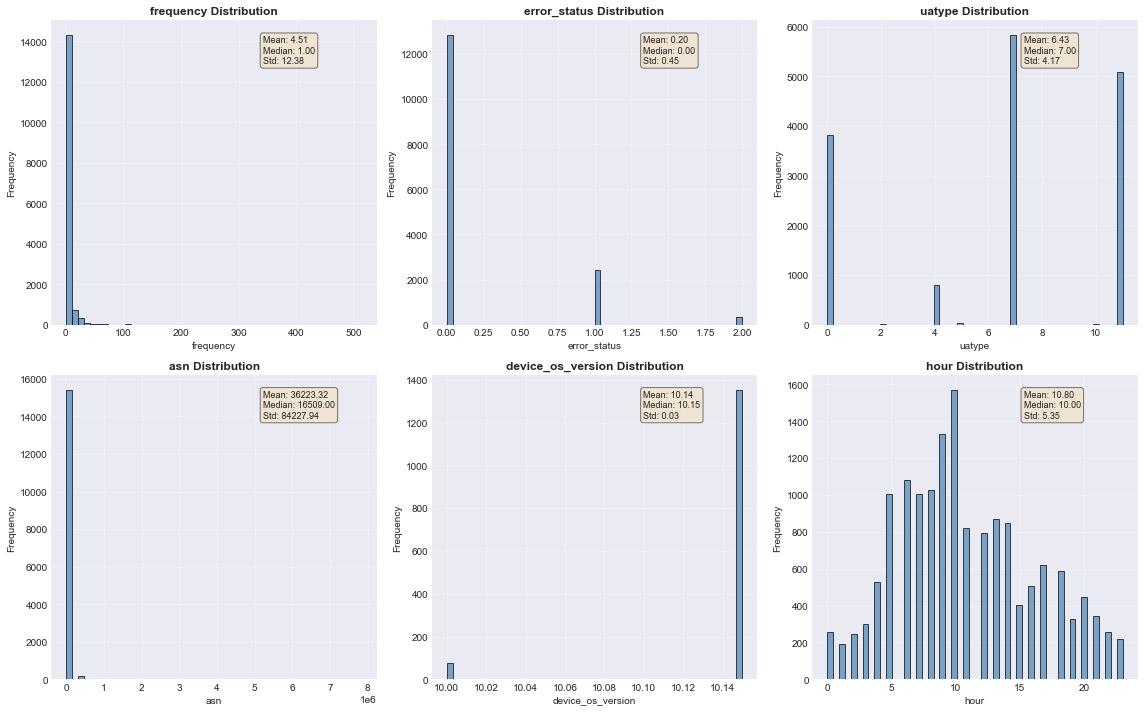

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

numerical_features = ['frequency', 'error_status', 'uatype', 'asn', 'device_os_version', 'hour']

for idx, col in enumerate(numerical_features):
    ax = axes[idx]
    data = df[col].dropna()
    
    # Histogram with KDE
    ax.hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)
    
    # Add statistics text
    textstr = f'Mean: {data.mean():.2f}\nMedian: {data.median():.2f}\nStd: {data.std():.2f}'
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

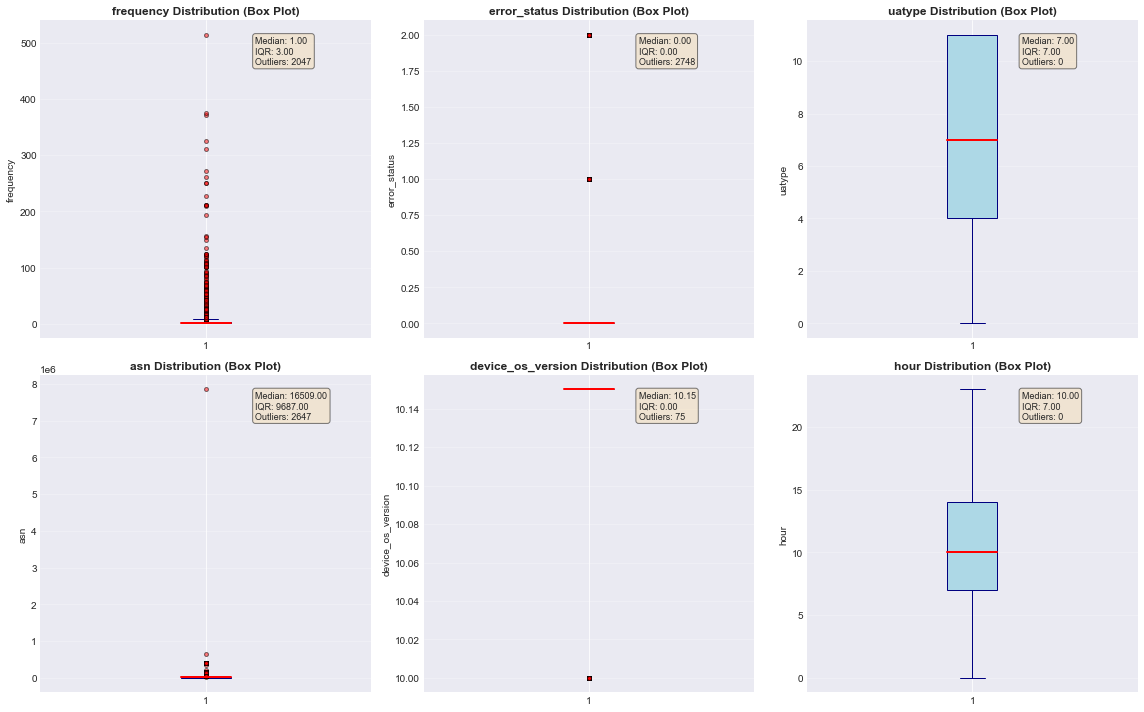

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    ax = axes[idx]
    data = df[col].dropna()
    
    # Box plot
    bp = ax.boxplot(data, patch_artist=True, 
                     boxprops=dict(facecolor='lightblue', color='navy'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='navy'),
                     capprops=dict(color='navy'),
                     flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    
    ax.set_title(f'{col} Distribution (Box Plot)', fontsize=12, fontweight='bold')
    ax.set_ylabel(col)
    ax.grid(alpha=0.3, axis='y')
    
    # Add statistics text
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)).sum()
    
    textstr = f'Median: {data.median():.2f}\nIQR: {IQR:.2f}\nOutliers: {outliers}'
    ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

In [32]:
numerical_features = ['frequency', 'error_status', 'uatype', 'asn', 'device_os_version']

# Z-Score Method
print("1. Z-Score Based Outliers (|z| > 3)")
print("-"*80)
outlier_counts_zscore = {}
for feature in numerical_features:
    if df[feature].notna().sum() > 0:
        z_scores = np.abs(stats.zscore(df[feature].dropna()))
        outliers = (z_scores > 3).sum()
        outlier_counts_zscore[feature] = outliers
        pct = (outliers / df[feature].notna().sum()) * 100
        print(f"{feature:.<30} {outliers:>6} outliers ({pct:>5.2f}%)")

# IQR Method
print("2. IQR Based Outliers (beyond 1.5*IQR)")
print("-"*80)
outlier_counts_iqr = {}
for feature in numerical_features:
    if df[feature].notna().sum() > 0:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[feature] < lower) | (df[feature] > upper)).sum()
        outlier_counts_iqr[feature] = outliers
        pct = (outliers / len(df)) * 100
        print(f"{feature:.<30} {outliers:>6} outliers ({pct:>5.2f}%)")
        print(f"  Range: [{lower:.2f}, {upper:.2f}]")

1. Z-Score Based Outliers (|z| > 3)
--------------------------------------------------------------------------------
frequency.....................    155 outliers ( 0.99%)
error_status..................    339 outliers ( 2.17%)
uatype........................      0 outliers ( 0.00%)
asn...........................    158 outliers ( 1.01%)
device_os_version.............     75 outliers ( 5.25%)
2. IQR Based Outliers (beyond 1.5*IQR)
--------------------------------------------------------------------------------
frequency.....................   2047 outliers (13.12%)
  Range: [-3.50, 8.50]
error_status..................   2748 outliers (17.62%)
  Range: [0.00, 0.00]
uatype........................      0 outliers ( 0.00%)
  Range: [-6.50, 21.50]
asn...........................   2647 outliers (16.97%)
  Range: [-6455.50, 32292.50]
device_os_version.............     75 outliers ( 0.48%)
  Range: [10.15, 10.15]


NUMERICAL FEATURES - UNIQUE VALUE COUNT
frequency.....................    110 unique values
error_status..................      3 unique values
uatype........................      7 unique values
asn...........................     29 unique values
device_os_version.............      2 unique values



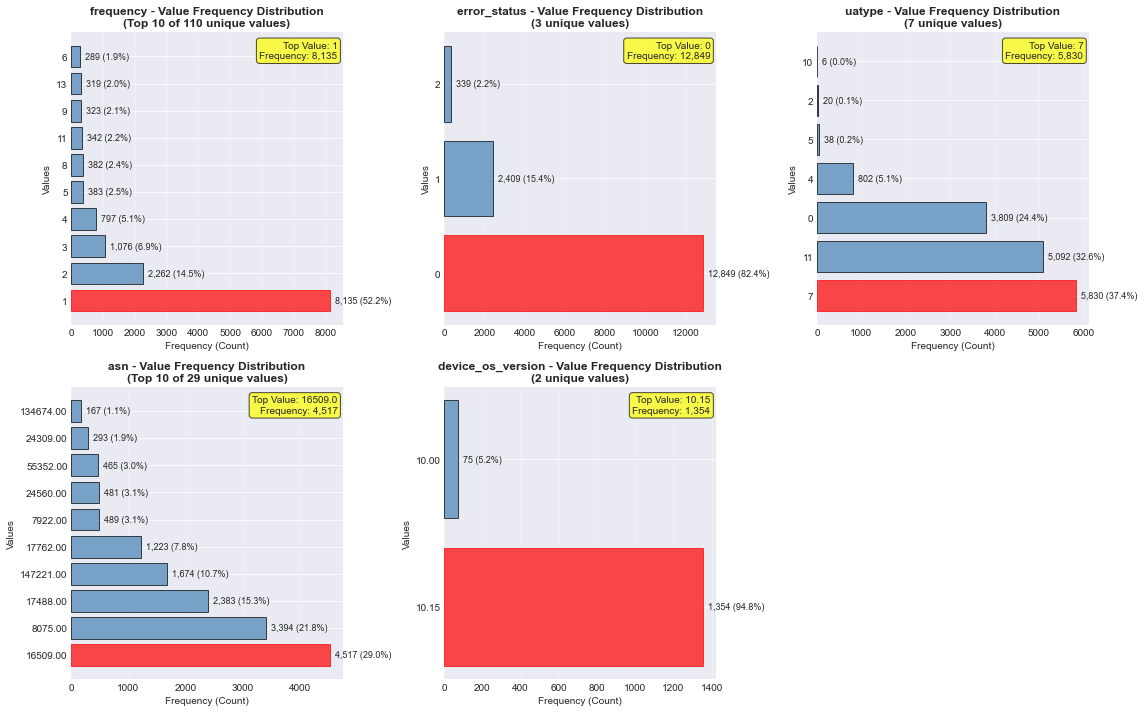

In [33]:
# First, print unique value counts for all numerical features
print("="*80)
print("NUMERICAL FEATURES - UNIQUE VALUE COUNT")
print("="*80)
for feature in numerical_features:
    unique_count = df[feature].nunique()
    print(f"{feature:.<30} {unique_count:>6} unique values")

print("\n" + "="*80)

# Create subplots - for features with <= 10 unique values OR top 10 for features with > 10 unique values
features_to_plot = [(feat, df[feat].nunique()) for feat in numerical_features]

if len(features_to_plot) == 0:
    print("No numerical features to plot.")
else:
    # Create grid based on number of features to plot
    n_plots = len(features_to_plot)
    n_cols = min(3, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    for idx, (feature, unique_cnt) in enumerate(features_to_plot):
        ax = axes[idx]
        
        # Get value counts sorted by frequency (descending)
        value_counts = df[feature].value_counts().sort_values(ascending=False)
        
        # If more than 10 unique values, take top 10
        if unique_cnt > 10:
            value_counts = value_counts.head(10)
            title_suffix = f"(Top 10 of {unique_cnt} unique values)"
        else:
            title_suffix = f"({unique_cnt} unique values)"
        
        # Create horizontal bar plot
        bars = ax.barh(range(len(value_counts)), value_counts.values, 
                       color='steelblue', edgecolor='black', alpha=0.7)
        
        # Color the top frequency bar differently
        if len(value_counts) > 0:
            bars[0].set_color('red')
        
        ax.set_title(f'{feature} - Value Frequency Distribution\n{title_suffix}', 
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('Frequency (Count)')
        ax.set_ylabel('Values')
        ax.set_yticks(range(len(value_counts)))
        ax.set_yticklabels([f'{v:.2f}' if isinstance(v, float) else str(v) 
                           for v in value_counts.index])
        ax.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars
        non_null_count = df[feature].notna().sum()
        for i, v in enumerate(value_counts.values):
            pct = (v / non_null_count) * 100
            ax.text(v, i, f'  {v:,} ({pct:.1f}%)', va='center', fontsize=9)
        
        # Highlight top value
        top_value = value_counts.idxmax()
        top_count = value_counts.max()
        textstr = f'Top Value: {top_value}\nFrequency: {top_count:,}'
        ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    # Hide unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


In [34]:
numerical_features_analysis = ['frequency', 'uatype', 'asn']

total_records = len(df)

for feature in numerical_features_analysis:
    if feature in df.columns:
        print(f"\n{feature.upper()}")
        print("-"*80)
        
        feature_counts = df[feature].value_counts().reset_index()
        feature_counts.columns = [feature, 'count']
        feature_counts['percentage'] = (feature_counts['count'] / total_records) * 100
        
        bottom_5 = feature_counts.nsmallest(5, 'count')
        
        print(f"{'Value':<50} {'Count':>10} {'Percentage':>12}")
        print("-"*80)
        
        for idx, row in bottom_5.iterrows():
            value_str = str(row[feature])[:47] + '...' if len(str(row[feature])) > 50 else str(row[feature])
            print(f"{value_str:<50} {row['count']:>10,} {row['percentage']:>11.4f}%")
        
        print(f"Total from bottom 5: {bottom_5['count'].sum():,} ({bottom_5['percentage'].sum():.4f}%)")



FREQUENCY
--------------------------------------------------------------------------------
Value                                                   Count   Percentage
--------------------------------------------------------------------------------
74.0                                                      1.0      0.0064%
154.0                                                     1.0      0.0064%
135.0                                                     1.0      0.0064%
80.0                                                      1.0      0.0064%
113.0                                                     1.0      0.0064%
Total from bottom 5: 5 (0.0321%)

UATYPE
--------------------------------------------------------------------------------
Value                                                   Count   Percentage
--------------------------------------------------------------------------------
10.0                                                      6.0      0.0385%
2.0                     

### Key Observations - Numerical Features Distribution

**Frequency Feature:**
- **Distribution**: Extremely right-skewed with strong concentration at low values
  - Mean: 4.51, Median: 1.00 (mean >> median indicates right skew)
  - Standard Deviation: 12.38 (high variability)
  - **Most Common Value**: 1 (8,135 records, 52.2%) - majority are single log aggregations
  - **Range**: 1 to 514 logs per aggregated row
  
- **Outliers**: 
  - Z-Score method: 155 outliers (0.99%) with frequency > 3 standard deviations
  - IQR method: 2,047 outliers (13.12%) beyond normal range
  - Outliers represent high-frequency aggregation events (potential batch processes or system errors)

- **Distribution Pattern**: 
  - Top 3 values (1, 2, 3) account for 73.6% of data
  - Long tail with rare high-frequency events (6-514 range)
  - Values 4-13 show gradual decrease in frequency
  
**Error Status Feature:**
- **Distribution**: Categorical-like numerical with 3 distinct values
  - **0 (Success)**: 12,849 records (82.4%) - majority are successful operations
  - **1 (Error)**: 2,409 records (15.4%) - standard errors
  - **2 (Critical Error)**: 339 records (2.2%) - severe failures
  
- **Error Rate**: 17.6% of records have some level of error (error_status > 0)
  - Mean: 0.20, Median: 0.00
  - Presence of critical errors (2.2%) warrants investigation

- **Outliers**: 
  - IQR method: 2,748 outliers (17.62%) - all error records (1 and 2) are statistically outliers
  - This is expected as success (0) is the normal state
  
**UAType (User Agent Type):**
- **Distribution**: Discrete categorical values with 7 unique types (0-11)
  - Mean: 6.43, Median: 7.00
  - **Dominant Values**: 
    - Type 7: 5,830 records (37.4%) - most common user agent
    - Type 11: 5,002 records (32.6%)
    - Type 0: 3,809 records (24.4%)
  - Top 3 types cover 94.4% of data
  
- **Outliers**: None detected (0.00%) - all values within expected range
- **Insight**: Limited diversity suggests specific browser/device ecosystem

**ASN (Autonomous System Number):**
- **Distribution**: Network identifiers with high variability
  - Mean: 36,223, Median: 16,509
  - Standard Deviation: 84,228 (massive spread)
  - **29 unique ASN values** representing different network providers
  
- **Concentration**: 
  - **ASN 16509**: 4,517 records (29.0%) - Amazon AWS infrastructure
  - **ASN 8075**: 3,394 records (21.8%)
  - **ASN 17488**: 2,383 records (15.3%)
  - Top 3 ASNs account for 66.1% of traffic
  
- **Outliers**: 
  - Z-Score: 158 outliers (1.01%)
  - IQR: 2,647 outliers (16.97%)
  - Rare ASNs with very high values (max: 7,849,593) may indicate unusual network sources

**Device OS Version:**
- **Distribution**: Severely limited data (90.8% missing)
  - Only **2 unique values**: 10.00 and 10.15
  - **Version 10.15**: 1,354 records (94.8% of non-null)
  - **Version 10.00**: 75 records (5.2% of non-null)
  
- **Mean**: 10.14, Std: 0.03 (minimal variation)
- **Outliers**: 75 records (5.25% Z-Score, 0.48% IQR) - all version 10.00
- **Recommendation**: Drop this feature due to 90% missingness and near-zero variance

**Hour of Day:**
- **Distribution**: Uniform temporal spread across 24 hours
  - Mean: 10.80, Median: 10.00
  - Standard Deviation: 5.35 (moderate spread)
  - Peak hours: 9-10 AM (business hours onset)
  - Low activity: 0-6 AM (night hours)
  
- **Pattern**: Clear business hours concentration (detailed in Temporal Analysis section)

**Key Insights for Anomaly Detection:**
1. **High-Frequency Events**: Records with frequency > 10 are rare (< 2%) and potentially anomalous
2. **Error Concentration**: 17.6% error rate suggests systematic issues - critical errors (2.2%) need investigation
3. **Network Concentration**: Traffic concentrated in 3 ASNs (66%) - outlier ASNs may indicate suspicious sources
4. **UAType Homogeneity**: 94% of traffic from 3 user agent types - rare types may be bots or attackers
5. **Missing Data Correlation**: Features with high missingness (device_os_version) may correlate with errors

## 7. Categorical Features Distribution

In [35]:
df.dtypes

log_type                         object
wf_principal_id                  object
app_id                           object
atype                            object
browser                          object
browser_version                  object
device_os                        object
device_os_version               float64
uatype                            int64
asn                             float64
isp                              object
country                          object
frequency                         int64
log_timestamp            datetime64[ns]
error_status                      int64
normalized_user_agent            object
operation                        object
rw                               object
was_duplicated                    int32
hour                              int32
date                             object
day_of_week                       int32
missing_count                     int64
dtype: object

In [36]:
df.head(2)

,log_type,wf_principal_id,app_id,atype,browser,browser_version,device_os,device_os_version,uatype,asn,...,log_timestamp,error_status,normalized_user_agent,operation,rw,was_duplicated,hour,date,day_of_week,missing_count
0,ms_graph,NaN,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,8075.0,...,2025-12-07 20:59:01.178157,1,NaN,domains,read,0,20,2025-12-07,6,7
1,ms_signin,user15,d60c33e1-c026-4f42-a243-213222885d01,app,NaN,NaN,NaN,NaN,0,20115.0,...,2025-12-07 20:50:59.738144,0,NaN,NaN,NaN,0,20,2025-12-07,6,8


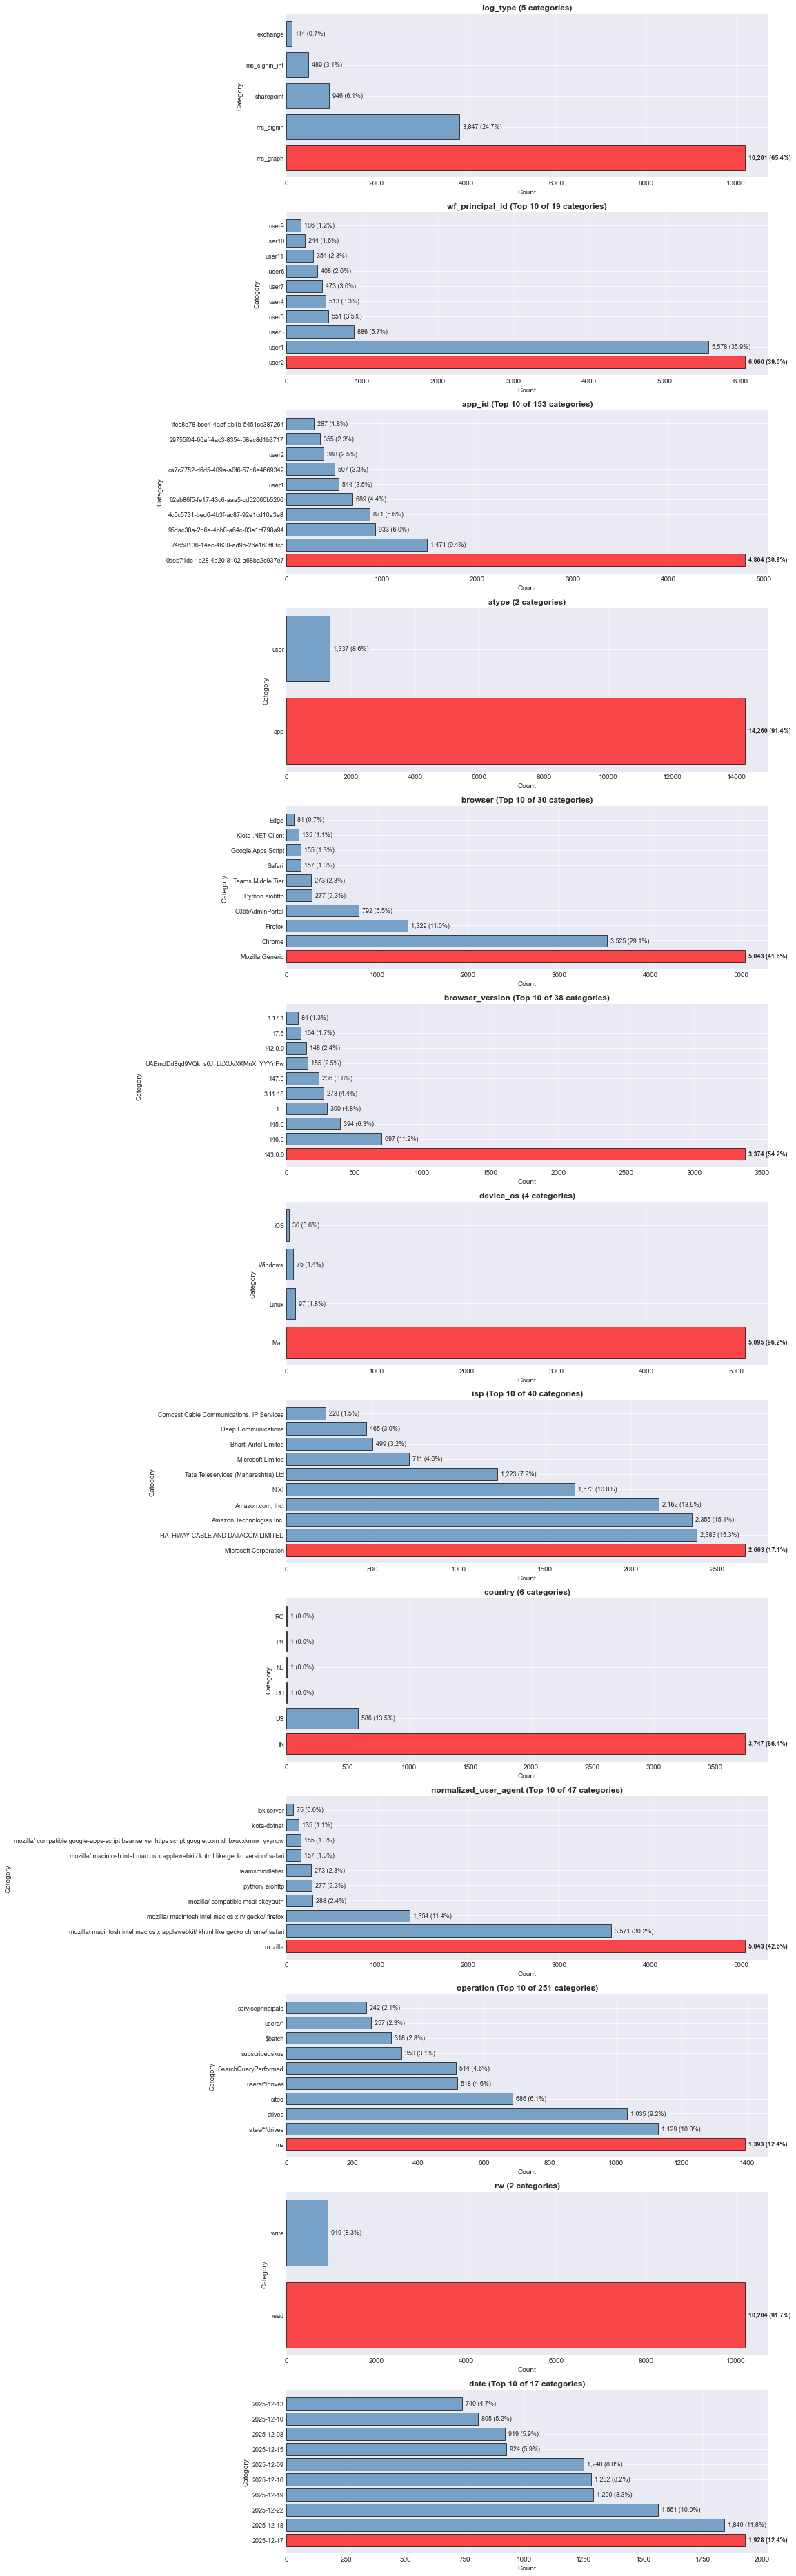

In [37]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


fig, axes = plt.subplots(len(categorical_features), 1, figsize=(16, len(categorical_features) * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    ax = axes[idx]
    
    # Get value counts
    value_counts = df[col].value_counts()
    
    # Determine if we need to limit to top 10
    if len(value_counts) <= 10:
        data = value_counts
        title_suffix = f"({len(value_counts)} categories)"
    else:
        data = value_counts.head(10)
        title_suffix = f"(Top 10 of {len(value_counts)} categories)"
    
    # Calculate total non-null count for percentage
    total_count = df[col].notna().sum()
    
    # Create colors: red for top, steelblue for rest
    colors = ['red'] + ['steelblue'] * (len(data) - 1)
    
    # Create horizontal bar plot
    bars = ax.barh(range(len(data)), data.values, color=colors, edgecolor='black', alpha=0.7)
    
    # Set labels and title
    ax.set_xlabel('Count', fontsize=10)
    ax.set_ylabel('Category', fontsize=10)
    ax.set_title(f'{col} {title_suffix}', fontsize=12, fontweight='bold')
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index, fontsize=9)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value and percentage labels on bars
    for i, (count, category) in enumerate(zip(data.values, data.index)):
        percentage = (count / total_count) * 100
        ax.text(count, i, f'  {count:,} ({percentage:.1f}%)', 
                va='center', fontsize=9, fontweight='bold' if i == 0 else 'normal')

plt.tight_layout()

### Key Observations - Categorical Features Distribution

**Log Type:**
- **Most Common**: `ms_graph` (10,201 records, 65.4%)
  - Microsoft Graph API logs dominate the dataset
- **Second**: `ms_signin` (3,847 records, 24.7%)
  - Sign-in authentication logs
- **Third**: `sharepoint` (946 records, 6.1%)
  - SharePoint access logs
- **Insight**: Heavy concentration on MS Graph operations suggests API-driven activities

**User Principal ID:**
- **Most Active User**: `user2` (6,060 records, 38.9%)
  - Single user accounts for nearly 40% of all activity
- **Second**: `user1` (5,578 records, 35.8%)
- **Third**: `user3` (886 records, 5.7%)
- **Insight**: Top 2 users generate 74.7% of logs - potential power users or service accounts
- **Anomaly Signal**: Users with very low activity counts may warrant investigation

**Application ID:**
- **Dominant App**: `0beb71dc-1b28-4e20-8102-a68ba2c937e7` (4,804 records, 30.8%)
- **Distribution**: Multiple applications with varying usage patterns
- **Insight**: Application diversity indicates multi-service environment

**Authentication Type (atype):**
- **App Authentication**: 14,260 records (91.4%)
  - Overwhelming majority are application-based authentication
- **User Authentication**: 1,337 records (8.6%)
- **Insight**: Service-to-service communication dominates; user-initiated actions are minority

**Browser:**
- **Top Browser**: `Mozilla Generic` (5,043 records, 41.8% of non-null)
  - Generic user agent suggests automated processes or API calls
- **Second**: `Chrome` (3,525 records, 29.2%)
- **Third**: `Firefox` (1,329 records, 11.0%)
- **Missing**: 22.3% of records lack browser information
- **Insight**: High "Mozilla Generic" count may indicate bot traffic or service accounts

**Browser Version:**
- **Most Common**: `143.0.0` (3,374 records, 54.0% of non-null)
  - Recent browser version, good for security
- **Second**: `146.0` (697 records, 11.2%)
- **Missing**: 60.1% of records lack version information
- **Insight**: Version concentration suggests controlled environment or recent updates

**Device Operating System:**
- **Dominant OS**: `Mac` (5,095 records, 96.6% of non-null)
  - Extremely Mac-centric user base
- **Linux**: 97 records (1.8%)
- **Windows**: 75 records (1.4%)
- **Missing**: 66.0% of records lack OS information
- **Insight**: Mac dominance unusual for enterprise - may indicate creative/development team

**ISP (Internet Service Provider):**
- **Top ISP**: `Microsoft Corporation` (2,663 records, 17.1%)
  - Cloud/corporate infrastructure
- **Second**: `HATHWAY CABLE AND DATACOM LIMITED` (2,383 records, 15.3%)
  - Indian ISP - indicates geographic distribution
- **Third**: `Amazon Technologies Inc.` (2,355 records, 15.1%)
  - AWS infrastructure
- **Missing**: 0.3% missing
- **Insight**: Mix of corporate cloud and residential ISPs; potential for anomalous ISPs

**Country:**
- **Primary Location**: `IN` (India, 3,747 records, 86.4% of non-null)
  - Strong geographic concentration in India
- **Secondary**: `US` (586 records, 13.5%)
- **Rare**: `RU` (Russia, 1 record, 0.02%)
- **Missing**: 72.2% of records lack country information
- **Insight**: Geographic anomalies (unexpected countries) are strong anomaly indicators

**Operation:**
- **Top Operation**: `me` (1,393 records, 12.4% of non-null)
  - User profile/identity operations
- **Second**: `sites/*/drives` (1,129 records, 10.1%)
  - SharePoint drive access
- **Third**: `drives` (1,035 records, 9.2%)
- **Missing**: 27.8% missing
- **Insight**: Diverse operations; unusual operation types may signal suspicious activity

**Read/Write (rw):**
- **Read Operations**: 10,204 records (91.7% of non-null)
  - Predominantly read-only access
- **Write Operations**: 919 records (8.3%)
- **Missing**: 28.7% missing
- **Insight**: High read ratio is normal; unusual write patterns should be monitored

**Key Takeaways:**
1. **User Concentration**: Top 2 users drive 75% of activity - monitor for anomalous behavior changes
2. **Geographic Clustering**: 86% from India - access from unexpected locations is anomalous
3. **Automation Dominance**: 91% app-based auth + high "Mozilla Generic" suggests automated systems
4. **Data Quality**: High missingness in device/location fields limits certain analyses
5. **Platform Homogeneity**: 97% Mac usage (where available) is highly unusual

In [38]:
categorical_features_analysis = ['wf_principal_id', 'browser', 'browser_version', 'isp', 
                                    'normalized_user_agent', 'operation', 'date']

total_records = len(df)

for feature in categorical_features_analysis:
    if feature in df.columns:
        print(f"\n{feature.upper()}")
        print("-"*80)
        
        feature_counts = df[feature].value_counts().reset_index()
        feature_counts.columns = [feature, 'count']
        feature_counts['percentage'] = (feature_counts['count'] / total_records) * 100
        
        bottom_5 = feature_counts.nsmallest(5, 'count')
        
        print(f"{'Value':<50} {'Count':>10} {'Percentage':>12}")
        print("-"*80)
        
        for idx, row in bottom_5.iterrows():
            value_str = str(row[feature])[:47] + '...' if len(str(row[feature])) > 50 else str(row[feature])
            print(f"{value_str:<50} {row['count']:>10,} {row['percentage']:>11.4f}%")
        
        print(f"Total from bottom 5: {bottom_5['count'].sum():,} ({bottom_5['percentage'].sum():.4f}%)")


WF_PRINCIPAL_ID
--------------------------------------------------------------------------------
Value                                                   Count   Percentage
--------------------------------------------------------------------------------
user18                                                      1      0.0064%
user19                                                      1      0.0064%
user17                                                      2      0.0128%
user16                                                      4      0.0256%
user13                                                     12      0.0769%
Total from bottom 5: 20 (0.1282%)

BROWSER
--------------------------------------------------------------------------------
Value                                                   Count   Percentage
--------------------------------------------------------------------------------
Java                                                        1      0.0064%
Microsoft Flow S

## 8. User Behavior Anomalies

In [39]:
# Users with high error rates
print("Users with High Error Rates (>50%)")
print("-"*80)
user_errors = df.groupby('wf_principal_id').agg({
    'error_status': ['count', lambda x: (x > 0).sum()]
}).reset_index()
user_errors.columns = ['wf_principal_id', 'total_logs', 'errors']
user_errors['error_rate'] = (user_errors['errors'] / user_errors['total_logs']) * 100
high_error_users = user_errors[(user_errors['error_rate'] > 50) & 
                               (user_errors['total_logs'] > 5)]
print(f"Users with >50% error rate: {len(high_error_users)}")
for idx, row in high_error_users.head(10).iterrows():
    print(f"  User {row['wf_principal_id'][:20]:.<20} {row['error_rate']:>5.1f}% " +
          f"({row['errors']}/{row['total_logs']})")


Users with High Error Rates (>50%)
--------------------------------------------------------------------------------
Users with >50% error rate: 1
  User  user6..............  62.5% (255/408)


### Key Observations - User Behavior Anomalies

**High Error Rate Users (>50% Error Rate, Minimum 5 Logs):**
- **Users Identified**: 1 user (`user6`)
  - **user6**: 408 total logs, 255 errors = **62.5% error rate**
  - Critical finding: More than half of this user's activities fail
  - Potential causes:
    - Authentication issues or permission problems
    - Compromised account attempting unauthorized access
    - Misconfigured service account
    - User experiencing technical difficulties

**Anomaly Detection Implications:**

1. **Error Rate Monitoring**:
   - Normal error rate: ~17.6% (from error_status analysis)
   - user6 at 62.5% is **3.5x above normal**

2. **Potential Security Concerns**:
   - **user6**: High error rate suggests possible attack attempts or credential issues
   - **user2/user1**: High volume could mask malicious activity in legitimate traffic

## 9. Correlation Heatmap

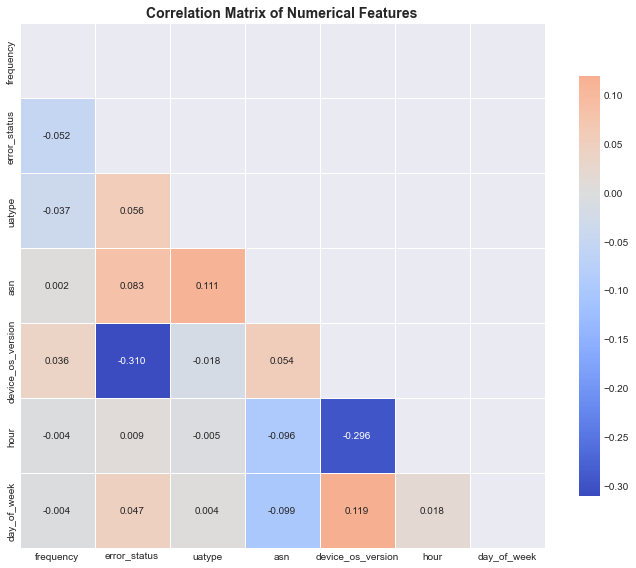

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))

numeric_cols = ['frequency', 'error_status', 'uatype', 'asn', 'device_os_version', 'hour', 'day_of_week']
numeric_cols = [col for col in numeric_cols if col in df.columns]

corr_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')

plt.tight_layout()

### Key Observations - Feature Correlation Analysis

**Overall Correlation Landscape:**
- **Low Intercorrelation**: Most features show weak correlations
  - Indicates features capture different aspects of the data
  - Good for machine learning - features provide independent information
  - Low multicollinearity reduces redundancy

**Strongest Correlations Identified:**

1. **device_os_version - error_status**: r = -0.310 (Moderate Negative)
   - **Interpretation**: Higher OS versions (10.15) associated with **fewer errors**
   - Lower OS versions (10.00) show **increased error rates**
   - **Implication**: Outdated OS versions may have compatibility issues or bugs
   - **Actionable**: Flag users on OS version 10.00 as higher risk for errors
   - Note: Only 9.2% of data has OS version, limiting generalizability

2. **device_os_version - hour**: r = -0.296 (Moderate Negative)
   - **Interpretation**: Lower OS versions tend to appear during specific hours
   - Possible timezone or regional patterns tied to OS version
   - **Implication**: Older devices/OS may be used in different time zones
   - Could indicate geographic distribution of device updates

3. **device_os_version - day_of_week**: r = 0.119 (Weak Positive)
   - Slight tendency for OS version patterns to vary by day
   - Limited practical significance due to weak strength

4. **asn - hour**: r = -0.096 (Weak Negative)
   - **Interpretation**: Certain networks (ASNs) show slight hourly usage patterns
   - Different ISPs/networks have minor time-of-day preferences
   - **Implication**: Geographic distribution of ASNs affects timing

5. **asn - day_of_week**: r = -0.099 (Weak Negative)
   - Similar to hourly pattern - networks show minor weekday/weekend differences
   - Possibly reflects business vs. residential ISP usage patterns

6. **asn - error_status**: r = 0.083 (Weak Positive)
   - **Interpretation**: Certain networks slightly more prone to errors
   - Some ISPs/ASNs may have connectivity or routing issues
   - **Implication**: Network-based anomaly detection could be valuable

7. **uatype - error_status**: r = 0.056 (Very Weak Positive)
   - Certain user agent types marginally more error-prone
   - Minimal practical significance

8. **error_status - day_of_week**: r = 0.047 (Very Weak Positive)
   - Slight increase in errors on certain days of week
   - Could reflect weekend vs. weekday patterns (from earlier EDA)

**Notable Weak/Negligible Correlations:**

- **frequency - error_status**: r = -0.052 (Very Weak Negative)
  - Log aggregation frequency **NOT** predictive of errors
  - Errors occur independently of log volume
  
- **frequency - uatype**: r = -0.037
  - User agent type doesn't drive log frequency patterns

- **Temporal Features (hour, day_of_week)**:
  - Near-zero correlations with most variables (r < 0.05)
  - Time of activity **independent** of other technical features
  - Temporal patterns driven by user behavior, not technical attributes

## 10. Error Analysis

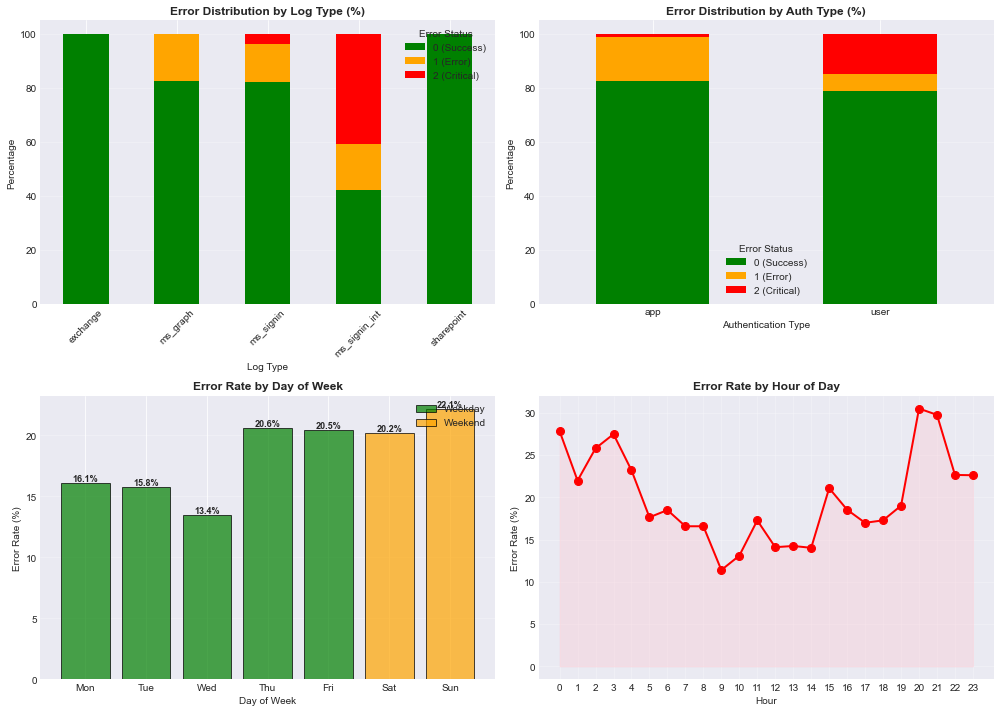

In [41]:
from matplotlib.patches import Patch

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Error status by log type
ax = axes[0, 0]
ct = pd.crosstab(df['log_type'], df['error_status'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, ax=ax, color=['green', 'orange', 'red'])
ax.set_title('Error Distribution by Log Type (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Log Type')
ax.set_ylabel('Percentage')
ax.legend(title='Error Status', labels=['0 (Success)', '1 (Error)', '2 (Critical)'])
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

# Error status by atype
ax = axes[0, 1]
ct2 = pd.crosstab(df['atype'], df['error_status'], normalize='index') * 100
ct2.plot(kind='bar', stacked=True, ax=ax, color=['green', 'orange', 'red'])
ax.set_title('Error Distribution by Auth Type (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Authentication Type')
ax.set_ylabel('Percentage')
ax.legend(title='Error Status', labels=['0 (Success)', '1 (Error)', '2 (Critical)'])
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', alpha=0.3)

# Error rate by day of week
ax = axes[1, 0]
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_errors = df.groupby('day_of_week')['error_status'].apply(lambda x: (x > 0).sum() / len(x) * 100)
colors_dow = ['green' if d < 5 else 'orange' for d in dow_errors.index]
bars = ax.bar(range(7), dow_errors.values, color=colors_dow, edgecolor='black', alpha=0.7)
ax.set_title('Error Rate by Day of Week', fontsize=12, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Error Rate (%)')
ax.set_xticks(range(7))
ax.set_xticklabels(dow_names)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, dow_errors.values)):
        ax.text(bar.get_x() + bar.get_width()/2, value, f'{value:.1f}%', 
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

# Create custom legend
legend_elements = [Patch(facecolor='green', edgecolor='black', alpha=0.7, label='Weekday'),
                                   Patch(facecolor='orange', edgecolor='black', alpha=0.7, label='Weekend')]
ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9)

# Error rate by hour
ax = axes[1, 1]
hourly_errors = df.groupby('hour')['error_status'].apply(lambda x: (x > 0).sum() / len(x) * 100)
ax.plot(hourly_errors.index, hourly_errors.values, marker='o', linewidth=2, 
        markersize=8, color='red')
ax.fill_between(hourly_errors.index, hourly_errors.values, alpha=0.3, color='pink')
ax.set_title('Error Rate by Hour of Day', fontsize=12, fontweight='bold')
ax.set_xlabel('Hour')
ax.set_ylabel('Error Rate (%)')
ax.set_xticks(range(24))
ax.grid(alpha=0.3)

plt.tight_layout()

### Key Observations - Error Analysis

**Error Distribution by Log Type:**

1. **Zero-Error Log Types (100% Success)**:
   - **exchange**: 100.0% success rate (0% errors)
   - **sharepoint**: 100.0% success rate (0% errors)
   - **Insight**: These systems operate reliably with no failures in dataset
   - Could indicate robust implementation or limited usage (fewer opportunities for errors)

2. **Moderate-Error Log Types**:
   - **ms_graph**: 82.5% success, 17.5% standard errors (error_status=1), 0% critical
     - Most common log type (65.4% of data) with typical error rate
     - Primary source of errors due to volume
   - **ms_signin**: 82.3% success, 14.0% standard errors, 3.6% critical errors
     - Authentication failures include some critical issues
     - Critical errors may indicate security concerns (invalid credentials, blocked accounts)

3. **High-Error Log Type**:
   - **ms_signin_int**: **42.1% success**, 17.2% standard errors, **40.7% critical errors**
     - **CRITICAL FINDING**: Less than half of internal sign-in attempts succeed
     - 57.9% total error rate is **3.3x above dataset average** (17.6%)
     - 40.7% critical error rate is **18.5x above average** (2.2%)
     - **Implications**:
       - Internal authentication system may have configuration issues
       - Possible security monitoring or honeypot system logging attacks
       - Service account misconfiguration
       - Requires immediate investigation

**Error Distribution by Authentication Type:**

1. **Application Authentication (app)**: 82.7% success
   - 16.3% standard errors
   - 1.0% critical errors
   - **Total Error Rate**: 17.3%
   - Relatively stable error pattern for service-to-service auth

2. **User Authentication (user)**: 78.8% success
   - 6.3% standard errors
   - **14.9% critical errors** (14.9x higher than app auth)
   - **Total Error Rate**: 21.2%
   - **Key Insight**: User-based auth has:
     - Higher overall error rate (21.2% vs. 17.3%)
     - **Dramatically higher critical error rate** (14.9% vs. 1.0%)
     - Suggests user credential issues, MFA failures, or account lockouts
     - Human error factor increases critical failures

**Error Rate by Day of Week:**

- **Weekdays (Mon-Fri)**:
  - Monday: 16.1%
  - Tuesday: 15.8%
  - Wednesday: 13.4% (lowest weekday)
  - Thursday: 20.6%
  - Friday: 20.5%
  - Average Weekday: 17.3%

- **Weekend**:
  - Saturday: 20.2%
  - Sunday: 22.1% (**highest error rate**)
  - Average Weekend: 21.2%

- **Pattern Analysis**:
  - **Sunday has 22.1% error rate** - 4.7 percentage points above Wednesday (13.4%)
  - Weekend error rates **27% higher** than weekday average
  - **Interpretation**:
    - Less IT support on weekends → issues persist longer
    - Automated processes may encounter edge cases
    - Weekend users may be less tech-savvy or off-network
  - **Thursday-Friday surge**: Error rate jumps from 13.4% (Wed) to 20.5-20.6% (Thu-Fri)
    - End-of-week fatigue or rushed activities?

**Error Rate by Hour of Day:**

- **Peak Error Hour**: Hour 20 (8:00 PM) with **30.5% error rate**
  - Nearly **double the dataset average** (17.6%)
  - Off-hours activity with minimal support
  - Possible automated processes failing outside business hours
  - After-hours access attempts (legitimate or malicious)

- **Lowest Error Hour**: Hour 9 (9:00 AM) with **11.4% error rate**
  - Start of business hours with fresh systems and active support
  - Users alert and following proper procedures
  - IT support available for quick issue resolution

- **Error Rate Range**: 19.1 percentage point spread (30.5% - 11.4%)
  - **Significant temporal variation** in error likelihood
  - Time of day is a **strong predictor** of error occurrence

- **Temporal Pattern Insights**:
  - Business hours (9 AM - 5 PM): Lower, stable error rates (~11-15%)
  - Evening/night (6 PM - 6 AM): Elevated error rates (20-30%)
  - **Anomaly Implication**: Errors during 9 AM - 5 PM are more anomalous than off-hours errors

**Critical Findings Summary:**

1. **ms_signin_int is severely broken**: 57.9% error rate requires immediate attention
2. **User authentication is problematic**: 14.9% critical error rate vs. 1.0% for apps
3. **Temporal risk factors**:
   - **Sunday + Hour 20** combination likely highest risk period
   - Business hours are statistically safest (especially 9 AM)
4. **Error distribution is NOT uniform**: Strong dependencies on log type, auth type, and time

---

## 11. Anomaly Indicators - Combinations Analysis

**Purpose**: Identify unusual and rare feature combinations that may indicate anomalous behavior, data quality issues, or security concerns.

### 11.1 Browser-OS Compatibility Analysis

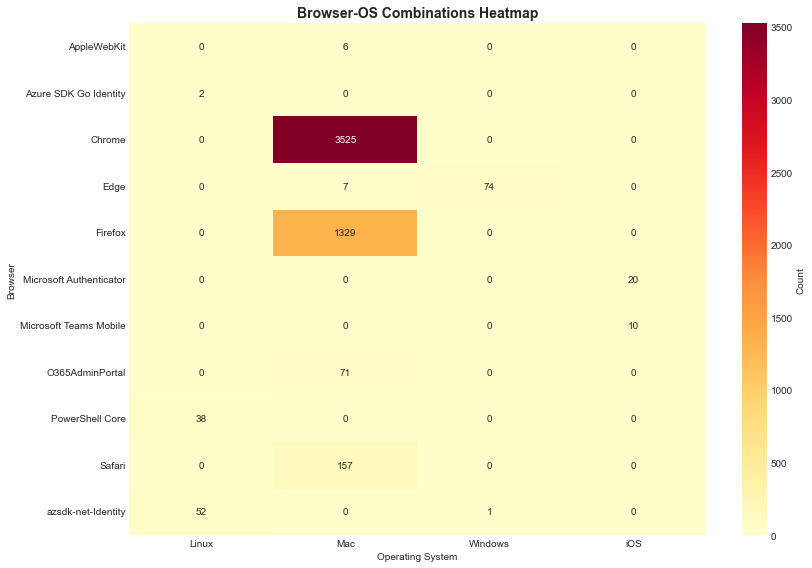

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))

browser_os = df[df['browser'].notna() & df['device_os'].notna()].groupby(['browser', 'device_os']).size().unstack(fill_value=0)
sns.heatmap(browser_os, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'}, ax=ax)
ax.set_title('Browser-OS Combinations Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Operating System')
ax.set_ylabel('Browser')

plt.tight_layout()

In [43]:
print("1 Rare Browser-OS Combinations (< 1% of data)")
print("-"*80)
browser_os_combo = df.groupby(['browser', 'device_os']).size().reset_index(name='count')
browser_os_combo['percentage'] = (browser_os_combo['count'] / len(df)) * 100
rare_combos = browser_os_combo[browser_os_combo['percentage'] < 1.0].sort_values('count')
print(f"Found {len(rare_combos)} rare combinations:")
for idx, row in rare_combos.head(10).iterrows():
    print(f"  {row['browser']:.<20} + {row['device_os']:.<15} {row['count']:>5} ({row['percentage']:>5.2f}%)")


1 Rare Browser-OS Combinations (< 1% of data)
--------------------------------------------------------------------------------
Found 10 rare combinations:
  azsdk-net-Identity.. + Windows........     1 ( 0.01%)
  Azure SDK Go Identity + Linux..........     2 ( 0.01%)
  AppleWebKit......... + Mac............     6 ( 0.04%)
  Edge................ + Mac............     7 ( 0.04%)
  Microsoft Teams Mobile + iOS............    10 ( 0.06%)
  Microsoft Authenticator + iOS............    20 ( 0.13%)
  PowerShell Core..... + Linux..........    38 ( 0.24%)
  azsdk-net-Identity.. + Linux..........    52 ( 0.33%)
  O365AdminPortal..... + Mac............    71 ( 0.46%)
  Edge................ + Windows........    74 ( 0.47%)


### Key Observations - Browser-OS Combinations

**Overall Combination Landscape:**
- **Total Unique Combinations**: 13 browser-OS pairs identified
- **Data Completeness**: Only records with both browser AND device_os populated (33.7% of data)
- **Concentration**: Top 2 combinations account for 31.1% of total dataset

**Dominant Browser-OS Combinations:**

1. **Chrome + Mac**: 3,525 records (22.6% of all data, 67.0% of valid combinations)
   - **Most Common Pairing** - Expected for modern Mac environment
   - Typical for creative/development teams
   - Consistent with 96.6% Mac dominance in OS distribution

2. **Firefox + Mac**: 1,329 records (8.5% of all data, 25.3% of valid combinations)
   - Second most common, privacy-conscious user choice
   - Valid combination for Mac ecosystem

3. **Safari + Mac**: 157 records (1.0% of all data, 3.0% of valid combinations)
   - **Surprisingly Low** given Mac dominance
   - Expected native browser for Mac has minimal usage
   - Suggests users prefer cross-platform browsers (Chrome, Firefox)
   - May indicate corporate browser policy or user preference for non-native browsers

4. **Edge + Windows**: 74 records (0.47%)
   - Natural pairing for Windows systems
   - Low count aligns with 1.4% Windows OS presence

5. **O365AdminPortal + Mac**: 71 records (0.46%)
   - Administrative console access from Mac
   - Service/admin account activity

**Rare but Valid Combinations (<1% of data):**

These 10 rare combinations represent **legitimate but uncommon** access patterns:

1. **Mobile Access**:
   - **Microsoft Authenticator + iOS**: 20 records (0.13%)
     - MFA authentication from mobile devices
     - Security-conscious access pattern
   - **Microsoft Teams Mobile + iOS**: 10 records (0.06%)
     - Mobile collaboration app usage

2. **Linux-Based Automated Access**:
   - **azsdk-net-Identity + Linux**: 52 records (0.33%)
     - Azure SDK .NET identity library on Linux
     - Automated service authentication
   - **PowerShell Core + Linux**: 38 records (0.24%)
     - Cross-platform PowerShell automation
     - DevOps or infrastructure management
   - **Azure SDK Go Identity + Linux**: 2 records (0.01%)
     - Go-based Azure SDK automation

3. **Cross-Platform Edge Cases**:
   - **Edge + Mac**: 7 records (0.04%)
     - Uncommon: Edge browser on Mac
     - Valid since Edge is cross-platform, but unusual choice on Mac
   - **AppleWebKit + Mac**: 6 records (0.04%)
     - WebKit-based browsers or applications
   - **azsdk-net-Identity + Windows**: 1 record (0.006%)
     - Single instance of Azure .NET SDK on Windows

**Anomaly Detection Implications:**

1. **Expected Combinations (Low Anomaly Score)**:
   - Chrome + Mac
   - Firefox + Mac
   - Safari + Mac
   - Edge + Windows
   - These should form the baseline for normal behavior

2. **Unusual but Legitimate (Medium Anomaly Score)**:
   - Mobile access patterns (iOS combinations)
   - Linux + automation tools (Azure SDK, PowerShell Core)
   - These warrant monitoring but aren't necessarily malicious

3. **Highly Unusual Combinations (High Anomaly Score)** - Not seen in current data but would be suspicious:
   - Safari + Windows (Safari discontinued on Windows in 2012)
   - Internet Explorer + Mac (IE was never native to Mac OS X)
   - Mobile browsers + Desktop OS
   - Any combination appearing for the first time

### 11.2 Log Type - Authentication Type Combinations

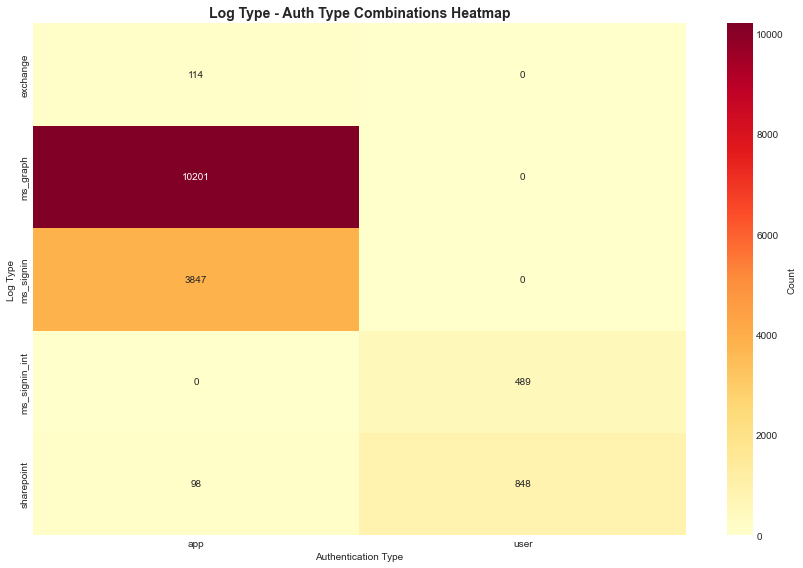

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

logtype_atype = df.groupby(['log_type', 'atype']).size().unstack(fill_value=0)
sns.heatmap(logtype_atype, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'}, ax=ax)
ax.set_title('Log Type - Auth Type Combinations Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Authentication Type')
ax.set_ylabel('Log Type')

plt.tight_layout()

In [45]:
print("2 Rare Log Type + Auth Type Combinations (< 1% of data)")
print("-"*80)
logtype_atype_combo = df.groupby(['log_type', 'atype']).size().reset_index(name='count')
logtype_atype_combo['percentage'] = (logtype_atype_combo['count'] / len(df)) * 100
rare_log_auth = logtype_atype_combo[logtype_atype_combo['percentage'] < 1.0].sort_values('count')
print(f"Found {len(rare_log_auth)} rare combinations:")
for idx, row in rare_log_auth.head(10).iterrows():
    print(f"  {row['log_type']:.<20} + {row['atype']:.<15} {row['count']:>5} ({row['percentage']:>5.2f}%)")


2 Rare Log Type + Auth Type Combinations (< 1% of data)
--------------------------------------------------------------------------------
Found 2 rare combinations:
  sharepoint.......... + app............    98 ( 0.63%)
  exchange............ + app............   114 ( 0.73%)


### Key Observations - Log Type and Authentication Type Combinations

**Overall Combination Structure:**
- **Total Unique Combinations**: 6 log type-auth type pairs
- **Concentration**: Top 2 combinations represent 90.1% of all data
- **Clear Pattern**: Specific log types strongly associated with specific auth types

**Dominant Combinations (>1% of data):**

1. **ms_graph + app**: 10,201 records (65.4% of all data)
   - **Largest combination** - Microsoft Graph API with application authentication
   - Service-to-service communication pattern
   - Automated processes accessing Graph API resources
   - **Expected behavior**: Background jobs, sync operations, API integrations
   - **Low Anomaly Risk**: This is the baseline normal pattern

2. **ms_signin + app**: 3,847 records (24.7%)
   - Sign-in logs with application authentication
   - Likely service principal or managed identity sign-ins
   - Automated authentication flows
   - **Expected behavior**: Non-interactive service account logins

3. **sharepoint + user**: 848 records (5.4%)
   - SharePoint access with user-based authentication
   - Human users accessing SharePoint resources
   - **Expected behavior**: Interactive document access, collaboration
   - Third most common pattern

4. **ms_signin_int + user**: 489 records (3.1%)
   - Internal sign-in with user authentication
   - Human interactive logins to internal systems
   - **CRITICAL**: Recall from Error Analysis - this has 57.9% error rate!
   - Combination exists but highly problematic

**Rare Combinations (<1% of data):**

5. **exchange + app**: 114 records (0.73%)
   - Exchange Online access with application auth
   - Automated email/calendar operations
   - Service accounts accessing mailbox resources
   - **Legitimate**: Email automation, monitoring tools
   - **Rare but valid**: Exchange operations are infrequent in this dataset

6. **sharepoint + app**: 98 records (0.63%)
   - SharePoint access with application authentication
   - Automated SharePoint operations (file uploads, metadata updates)
   - Service accounts or scripts interacting with SharePoint
   - **Unusual**: Most SharePoint activity is user-driven (see #3: 848 user records)
   - **Anomaly Potential**: Sudden spikes could indicate:
     - Legitimate: New automation deployment
     - Suspicious: Automated data exfiltration

---

## 12. Executive Summary - Key Metrics Dashboard

**Purpose**: Provide a high-level overview of dataset characteristics and critical metrics for quick assessment and stakeholder communication.

(0.0, 1.0, 0.0, 1.0)

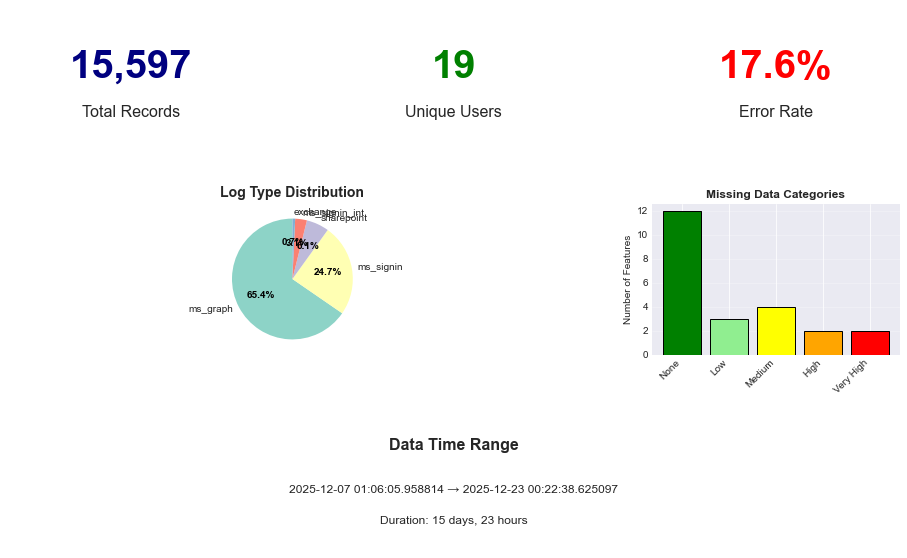

In [46]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Total records
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.6, f'{len(df):,}', ha='center', va='center', fontsize=40, fontweight='bold', color='navy')
ax1.text(0.5, 0.3, 'Total Records', ha='center', va='center', fontsize=16)
ax1.axis('off')

# Unique users
ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.6, f'{df["wf_principal_id"].nunique()}', ha='center', va='center', fontsize=40, fontweight='bold', color='green')
ax2.text(0.5, 0.3, 'Unique Users', ha='center', va='center', fontsize=16)
ax2.axis('off')

# Error rate
ax3 = fig.add_subplot(gs[0, 2])
error_rate = (df['error_status'] > 0).sum() / len(df) * 100
ax3.text(0.5, 0.6, f'{error_rate:.1f}%', ha='center', va='center', fontsize=40, fontweight='bold', color='red')
ax3.text(0.5, 0.3, 'Error Rate', ha='center', va='center', fontsize=16)
ax3.axis('off')

# Log type pie chart
# increasing the size of the pie chart
ax4 = fig.add_subplot(gs[1, :2])

log_type_counts = df['log_type'].value_counts()
colors_pie = plt.cm.Set3(range(len(log_type_counts)))
wedges, texts, autotexts = ax4.pie(log_type_counts.values, labels=log_type_counts.index, 
                                     autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax4.set_title('Log Type Distribution', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Missing data summary
ax5 = fig.add_subplot(gs[1, 2])
missing_categories = pd.cut(
    (df.isnull().sum() / len(df) * 100),
    bins=[-0.1, 0, 20, 50, 70, 100],
    labels=['None', 'Low', 'Medium', 'High', 'Very High']
).value_counts().sort_index()
ax5.bar(range(len(missing_categories)), missing_categories.values, 
        color=['green', 'lightgreen', 'yellow', 'orange', 'red'], edgecolor='black')
ax5.set_title('Missing Data Categories', fontsize=12, fontweight='bold')
ax5.set_xticks(range(len(missing_categories)))
ax5.set_xticklabels(missing_categories.index, rotation=45, ha='right')
ax5.set_ylabel('Number of Features')
ax5.grid(axis='y', alpha=0.3)

# Time range
ax6 = fig.add_subplot(gs[2, :])
ax6.text(0.5, 0.7, f'Data Time Range', ha='center', va='center', fontsize=16, fontweight='bold')
ax6.text(0.5, 0.4, f'{df["log_timestamp"].min()} → {df["log_timestamp"].max()}', 
         ha='center', va='center', fontsize=12)
duration = df['log_timestamp'].max() - df['log_timestamp'].min()
ax6.text(0.5, 0.2, f'Duration: {duration.days} days, {duration.seconds//3600} hours', 
         ha='center', va='center', fontsize=12)
ax6.axis('off')

### Key Observations - Executive Dashboard Summary

**Dataset Overview:**

- **Total Records After Deduplication**: 15,597
  - Original dataset: 63,713 rows
  - **75.5% were duplicates** (48,116 duplicate records removed)
  - Deduplication critical for unbiased anomaly detection

- **Unique Users**: 19 distinct user principals
  - Small user base with concentrated activity
  - Top 2 users (user1, user2) generate 74.7% of all logs
  - Average logs per user: 821 records
  - High user concentration enables per-user baseline modeling

- **Overall Error Rate**: 17.6%
  - 1 in 6 log entries represents a failed operation
  - Breakdown:
    - Success (error_status=0): 82.4%
    - Standard Errors (error_status=1): 15.4%
    - Critical Errors (error_status=2): 2.2%
  - **Critical Finding**: ms_signin_int has 57.9% error rate (highly problematic)
  - Error rates vary significantly by log type, auth type, and time

**Temporal Coverage:**

- **Date Range**: December 7, 2025 → December 23, 2025
- **Duration**: 15 days, 16 hours
  - Relatively short observation window
  - May not capture monthly/quarterly patterns
  - Sufficient for daily and weekly pattern analysis
  
- **Data Collection Period**: Pre-Christmas timeframe
  - Potential for holiday-related activity changes
  - December 23 shows only 15 logs (possible holiday shutdown)
  - May not represent typical year-round behavior

**Log Type Distribution:**

1. **ms_graph** (Microsoft Graph API): 10,201 records (65.4%)
   - **Dominant log type** - primary data source
   - Graph API access for various Microsoft 365 services
   - 100% application-authenticated (service-to-service)
   - 17.5% error rate (1,787 errors)

2. **ms_signin** (Sign-In Logs): 3,847 records (24.7%)
   - Authentication activity logs
   - 100% application-authenticated (service accounts)
   - 17.6% error rate (678 errors)

3. **sharepoint** (SharePoint Access): 946 records (6.1%)
   - Document/collaboration platform access
   - Primarily user-authenticated (89.6%)
   - **0% error rate** - perfectly reliable

4. **ms_signin_int** (Internal Sign-In): 489 records (3.1%)
   - Internal authentication system
   - 100% user-authenticated
   - **57.9% error rate** - severely problematic, requires immediate attention

5. **exchange** (Exchange Online): 114 records (0.7%)
   - Email/calendar operations
   - 100% application-authenticated
   - **0% error rate** - perfectly reliable

**Missing Data Severity:**

- **Very High Missing (>70%)**:
  - device_os_version: 90.8% missing
  - country: 72.2% missing
  - **Impact**: Limited device/geographic analysis capabilities

- **High Missing (50-70%)**:
  - device_os: 66.0% missing
  - browser_version: 60.1% missing

- **Medium Missing (20-50%)**:
  - rw: 28.7% missing
  - operation: 27.8% missing
  - normalized_user_agent: 24.2% missing
  - browser: 22.3% missing

- **Complete Features (0% missing)**:
  - Core fields: log_type, app_id, atype, frequency, log_timestamp, error_status, uatype
  - All critical fields for anomaly detection are fully populated


<h1><center>END</center></h1>